# Sentiment Analysis Using NLP and Logistic Regression

## Introduction
Sentiment Analysis is a key Natural Language Processing (NLP) task that determines the **emotional tone** of text. It is widely used in applications such as:
- Product reviews (positive/negative feedback)
- Social media monitoring
- Customer support analysis

In this project, we perform **binary sentiment classification** (positive or negative) on movie reviews using **TF-IDF feature extraction** and **Logistic Regression**.




# Steps Overview

### 1. Data Loading
- Load the dataset (IMDb movie reviews from NLTK).
- Convert into a pandas DataFrame with `text` and `label`.

### 2. Text Preprocessing
- **Lowercasing:** Convert all text to lowercase.
- **Tokenization:** Split text into individual words.
- **Stopwords Removal:** Remove common words like “the”, “is”.
- **Stemming:** Reduce words to their root form (e.g., “learning” → “learn”).
- **Lemmatization:** Convert words to their base dictionary form (e.g., “better” → “good”).
- **Optional:** Remove punctuation, numbers, or special characters.

### 3. Feature Extraction
- **Bag of Words (BoW):** Represent text as word counts.
- **TF-IDF (Term Frequency-Inverse Document Frequency):** Weigh words based on frequency.
- **Word Embeddings (Optional):** Dense vectors capturing semantic meaning.

### 4. Train/Test Split
- Split dataset into training and testing sets (e.g., 80% train, 20% test).

### 5. Model Training
- Train a machine learning model:
  - Logistic Regression (binary classification)
  - Naive Bayes
  - SVM, Random Forest, or Transformers (BERT) for advanced NLP.

### 6. Model Evaluation
- Accuracy, Confusion Matrix, Classification Report (Precision, Recall, F1-score).

### 7. Prediction on New Data
- Preprocess new text using the same steps.
- Transform using the trained vectorizer (BoW or TF-IDF).
- Predict sentiment using the trained model.


# Install & Import Libraries


In [1]:

!pip install nltk scikit-learn pandas

import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Anju\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

# Load Dataset

In [2]:
# Load movie reviews dataset from NLTK
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Convert to pandas DataFrame
df = pd.DataFrame(documents, columns=['words', 'label'])
df['text'] = df['words'].apply(lambda x: ' '.join(x))
df = df[['text', 'label']]
df.head()


,text,label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard ' s quick movie review damn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' first...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


# Text Preprocessing

In [3]:
# Lowercasing
df['text'] = df['text'].str.lower()

# Tokenization
df['tokens'] = df['text'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens_no_stop'] = df['tokens'].apply(lambda x: [w for w in x if w.isalpha() and w not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['stemmed'] = df['tokens_no_stop'].apply(lambda x: [stemmer.stem(w) for w in x])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens_no_stop'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

# Join tokens back to text
df['clean_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))
df.head()

,text,label,tokens,tokens_no_stop,stemmed,lemmatized,clean_text
0,"plot : two teen couples go to a church party ,...",neg,"[plot, :, two, teen, couples, go, to, a, churc...","[plot, two, teen, couples, go, church, party, ...","[plot, two, teen, coupl, go, church, parti, dr...","[plot, two, teen, couple, go, church, party, d...",plot two teen couple go church party drink dri...
1,the happy bastard ' s quick movie review damn ...,neg,"[the, happy, bastard, ', s, quick, movie, revi...","[happy, bastard, quick, movie, review, damn, b...","[happi, bastard, quick, movi, review, damn, bu...","[happy, bastard, quick, movie, review, damn, b...",happy bastard quick movie review damn bug got ...
2,it is movies like these that make a jaded movi...,neg,"[it, is, movies, like, these, that, make, a, j...","[movies, like, make, jaded, movie, viewer, tha...","[movi, like, make, jade, movi, viewer, thank, ...","[movie, like, make, jaded, movie, viewer, than...",movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' first...",neg,"[``, quest, for, camelot, ``, is, warner, bros...","[quest, camelot, warner, bros, first, feature,...","[quest, camelot, warner, bro, first, featur, l...","[quest, camelot, warner, bros, first, feature,...",quest camelot warner bros first feature length...
4,synopsis : a mentally unstable man undergoing ...,neg,"[synopsis, :, a, mentally, unstable, man, unde...","[synopsis, mentally, unstable, man, undergoing...","[synopsi, mental, unstabl, man, undergo, psych...","[synopsis, mentally, unstable, man, undergoing...",synopsis mentally unstable man undergoing psyc...


# Feature Extraction

In [4]:

# Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['clean_text'])
print("Bag of Words Feature Names:", vectorizer.get_feature_names_out()[:10])

# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['clean_text'])
print("TF-IDF Feature Names:", tfidf.get_feature_names_out()[:10])

Bag of Words Feature Names: ['aa' 'aaa' 'aaaaaaaaah' 'aaaaaaaahhhh' 'aaaaaah' 'aaaahhhs' 'aahs'
 'aaliyah' 'aalyah' 'aamir']
TF-IDF Feature Names: ['aa' 'aaa' 'aaaaaaaaah' 'aaaaaaaahhhh' 'aaaaaah' 'aaaahhhs' 'aahs'
 'aaliyah' 'aalyah' 'aamir']


# Train/Test Split

In [5]:
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [6]:
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [7]:
model=LogisticRegression(max_iter=500)
model.fit(X_train,y_train)


LogisticRegression(max_iter=500)

# Model Evaluation 

In [8]:
y_pred=model.predict(X_test)

In [9]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

print("Classification report:",classification_report(y_test,y_pred))

Accuracy Score: 0.81
Classification report:               precision    recall  f1-score   support

         neg       0.81      0.81      0.81       199
         pos       0.81      0.81      0.81       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



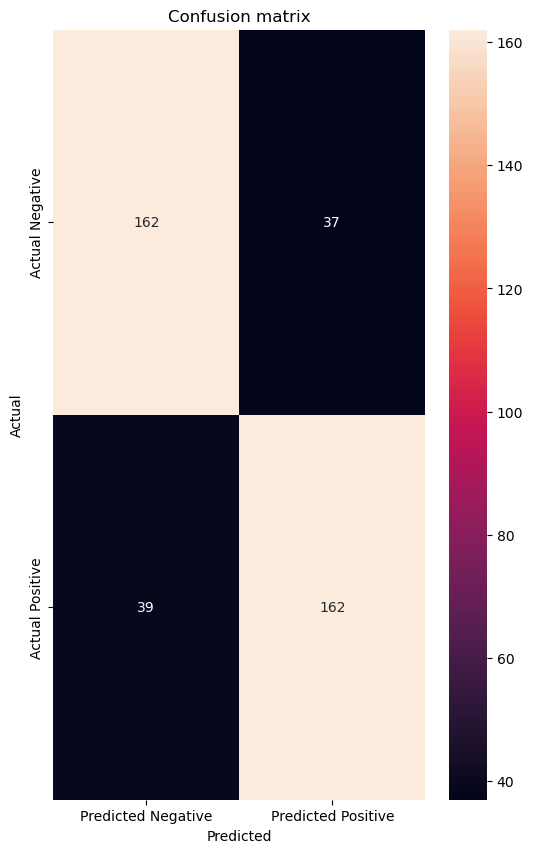

In [10]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,10))

sns.heatmap(cm,annot=True,xticklabels=["Predicted Negative","Predicted Positive"],fmt='d',
           yticklabels=["Actual Negative","Actual Positive"])

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion matrix")
plt.show()


In [11]:
sample_text = ["This movie was fantastic and I loved it!"]
sample_text_clean = [' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(sample_text[0].lower()) if w.isalpha() and w not in stop_words])]
sample_vector = tfidf.transform(sample_text_clean)
prediction = model.predict(sample_vector)
print("Prediction:", prediction[0])

Prediction: pos
